### **Connecting with Kaggle using API**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.jsona

chmod: cannot access '/root/.kaggle/kaggle.jsona': No such file or directory


### **importing kaggle file**

In [3]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 77% 115M/149M [00:00<00:00, 1.20GB/s]
100% 149M/149M [00:00<00:00, 1.19GB/s]


### **Unzipping imported file from Kaggle**

In [4]:
import zipfile
zip_ref = zipfile.PyZipFile('/content/brain-tumor-mri-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing libraries**

In [5]:
from PIL import Image #Image processing
import numpy as np #Numerical & array operations
import matplotlib.pyplot as plt #Plotting & visualization
import matplotlib.image as mpimg #Image display
import random #Random data generation
import os #File & directory handling
from sklearn.utils import shuffle #Randomize data safely

### **Extracting data from file**

In [ ]:

train_dir = '/content/Training' #training file path
test_dir = '/content/Testing' #testing file path

train_data = [] #Builing list for traing data
train_labels = [] #Builing label for training data

# Get only directories (class folders)
for label in os.listdir(train_dir):
      label_path = os.path.join(train_dir, label)

    # Skip if not a directory
    if not os.path.isdir(label_path):
        continue

    for img in os.listdir(label_path):
        # Only include image files
        if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')): #checking the image should be in given parameter
            train_data.append(os.path.join(train_dir, label, img))
            train_labels.append(label)

train_data, train_labels = shuffle(train_data, train_labels, random_state=42)


test_data = [] #Builing list for testing data
test_labels = []  #Builing label for testing data

for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)

    if not os.path.isdir(label_path):
        continue

    for img in os.listdir(label_path):
        if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')): #checking the image should be in given parameter
            test_data.append(os.path.join(test_dir, label, img))
            test_labels.append(label)

test_data, test_labels = shuffle(test_data, test_labels, random_state=42)

print(f"Training: {len(train_data)} images, {len(train_labels)} labels")
print(f"Testing: {len(test_data)} images, {len(test_labels)} labels")
print(f"Classes: {set(train_labels)}")

Training: 5712 images, 5712 labels
Testing: 1311 images, 1311 labels
Classes: {'notumor', 'glioma', 'meningioma', 'pituitary'}


In [ ]:
print(train_data[0:10]) #Checking image from 0 to 10
print(train_labels[0:10]) #Checking Label from 0 to 10

['/content/Training/glioma/Tr-gl_0289.jpg', '/content/Training/meningioma/Tr-me_1096.jpg', '/content/Training/notumor/Tr-no_0423.jpg', '/content/Training/pituitary/Tr-pi_0805.jpg', '/content/Training/pituitary/Tr-pi_1125.jpg', '/content/Training/meningioma/Tr-me_1248.jpg', '/content/Training/pituitary/Tr-pi_1008.jpg', '/content/Training/meningioma/Tr-me_0988.jpg', '/content/Training/notumor/Tr-no_1282.jpg', '/content/Training/notumor/Tr-no_0947.jpg']
['glioma', 'meningioma', 'notumor', 'pituitary', 'pituitary', 'meningioma', 'pituitary', 'meningioma', 'notumor', 'notumor']


In [ ]:
range(len(train_data)) #Image range

range(0, 5712)

In [ ]:
#taking random image index from data
random_index = random.sample(range(len(train_data)),10)
print(random_index)

[1550, 1067, 3040, 4365, 5269, 3182, 1581, 3080, 1771, 1473]


### **Building random visulization from data**

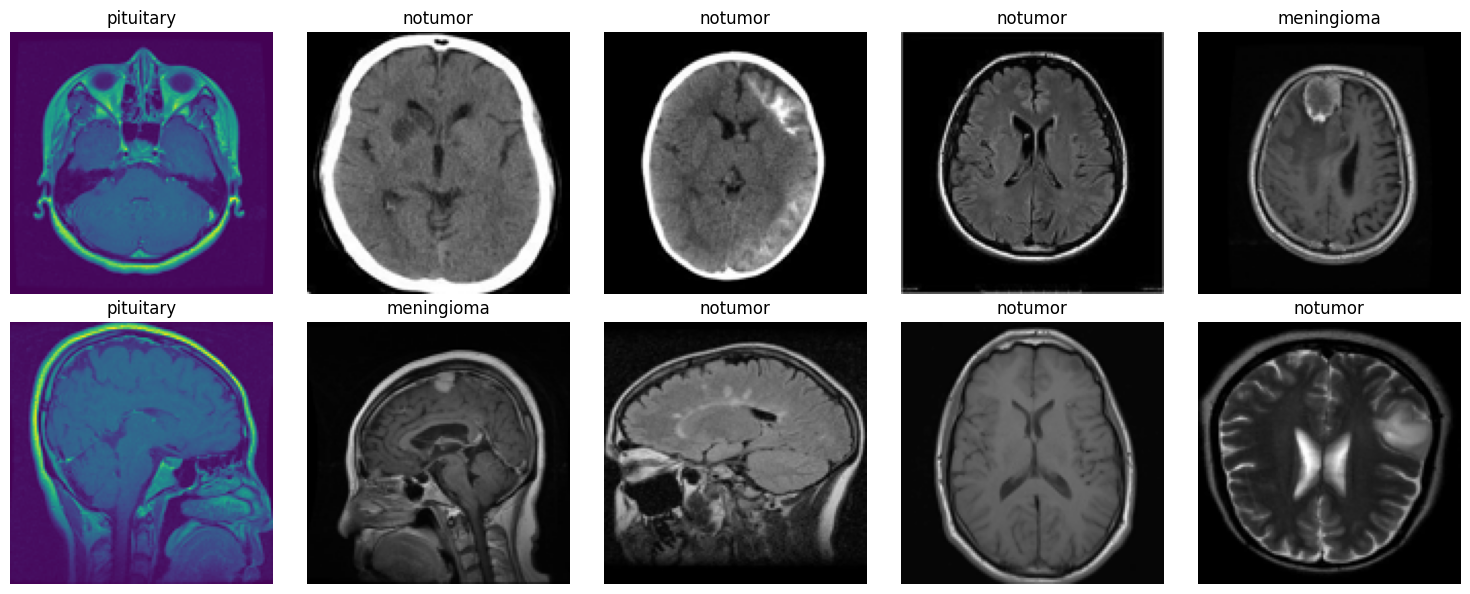

In [ ]:

plt.figure(figsize=(15,6))

for i, index in enumerate(random_index):
  plt.subplot(2, 5, i + 1) # 2 rows, 5 columns, (i+1)-th subplot

  image_path = train_data[index]
  image_label = train_labels[index]

  # Open the image using PIL to use the resize method
  img = Image.open(image_path)
  img = img.resize((128, 128)) # Must pass dimensions as a tuple

  plt.imshow(img)
  plt.title(image_label)
  plt.axis('off') # Hide axes for cleaner image display

plt.tight_layout()
plt.show()

### **Creating function**

In [ ]:
#for image processing
def image_processing(image_paths):  # Takes a LIST of paths
    images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        img = img.resize((128, 128))
        img = img.convert('RGB')
        img = np.array(img)/255.0 # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

#for Encoding
from sklearn.preprocessing import LabelEncoder
def endcoding(labels):
  le = LabelEncoder()
  labels = le.fit_transform(labels)
  return labels

### **Applying Function**

In [ ]:
training = image_processing(train_data) #Applied function on training data
train_labelling = endcoding(train_labels) #Applied function on training labeled data

### **Importing labraries**

In [ ]:
# Importing TensorFlow (core deep learning framework)
import tensorflow as tf

# Importing layers used to build neural networks
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

# Importing Sequential model to stack layers line by line
from tensorflow.keras.models import Sequential

# Importing pre-trained VGG16 model for transfer learning
from tensorflow.keras.applications import VGG16

# Importing Adam optimizer for faster and adaptive learning
from tensorflow.keras.optimizers import Adam

# Importing callbacks to control and optimize training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### **Model Archetecture**

In [ ]:
IMAGE_SIZE = 128

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


#Freezing all layer of VGG16 base_model
for layer in base_model.layers:
  layer.trainable = False

#Set Few Layer active
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# for layer in base_model.layers:
#  print(layer, layer.trainable)

#Model Building

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))) #Input layer
model.add(base_model) #VGG16 model
model.add(Flatten()) #flattening layer
model.add(Dropout(0.3)) #droping layer to avoid overfitting

model.add(Dense(128, activation='relu')) #Adding dense layer of 128
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax')) #output layer


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training, train_labelling, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 33s 149ms/step - accuracy: 0.7401 - loss: 0.6601 - val_accuracy: 0.8846 - val_loss: 0.3316
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.8990 - loss: 0.2512 - val_accuracy: 0.9266 - val_loss: 0.1608
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.9430 - loss: 0.1429 - val_accuracy: 0.9458 - val_loss: 0.1547
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.9581 - loss: 0.1016 - val_accuracy: 0.9423 - val_loss: 0.1414
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9753 - loss: 0.0757 - val_accuracy: 0.9615 - val_loss: 0.1178
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9528 - val_loss: 0.1441
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9811 - loss: 0.0494 - val_accuracy: 0.9633 - val_loss: 0.1431
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9925 - loss: 0.0237 -

### **Checking Acurracy using graph**

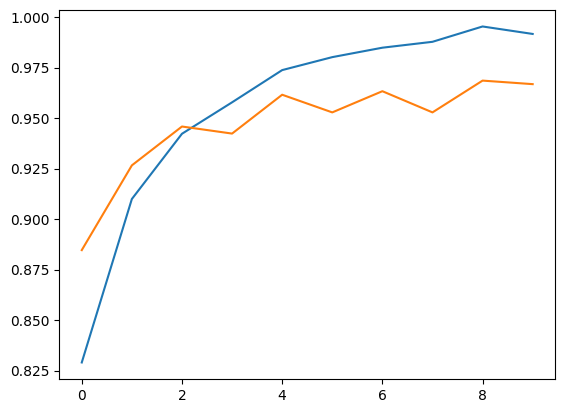

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### **Checking Loss using graph**

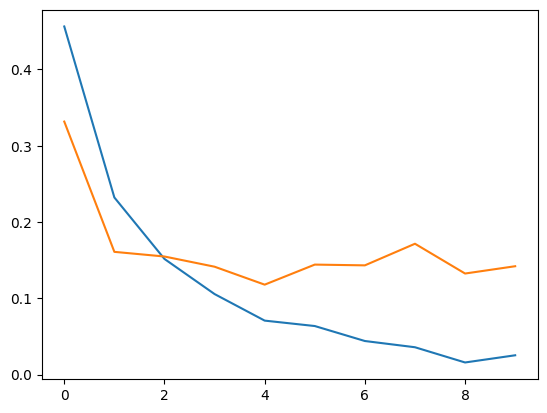

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### **Improved model**

In [ ]:
IMAGE_SIZE = 128
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

for layer in base_model1.layers[:-6]:  # Freeze all except last 6
    layer.trainable = False

model1 = Sequential()
model1.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))) #Input layer
model1.add(base_model1)

model1.add(GlobalAveragePooling2D())


model1.add(BatchNormalization())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.4))

model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(4, activation='softmax'))

In [ ]:
# Compile with lower learning rate
model1.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

In [ ]:
history1 = model1.fit(training, train_labelling, batch_size=32, validation_split=0.1, epochs=30, callbacks= [early_stopping,reduce_lr])

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - accuracy: 0.7011 - loss: 0.7917 - val_accuracy: 0.7727 - val_loss: 0.6833 - learning_rate: 1.0000e-04
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.8899 - loss: 0.2974 - val_accuracy: 0.7745 - val_loss: 0.6627 - learning_rate: 1.0000e-04
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9323 - loss: 0.1978 - val_accuracy: 0.8094 - val_loss: 0.5876 - learning_rate: 1.0000e-04
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.9459 - loss: 0.1463 - val_accuracy: 0.9073 - val_loss: 0.2847 - learning_rate: 1.0000e-04
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.9679 - loss: 0.0975 - val_accuracy: 0.8462 - val_loss: 0.4803 - learning_rate: 1.0000e-04
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.9765 - loss: 0.0865 - val_accuracy: 0.9178 - val_loss: 0.2651 - learning_rate: 1.0000e-04
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/st

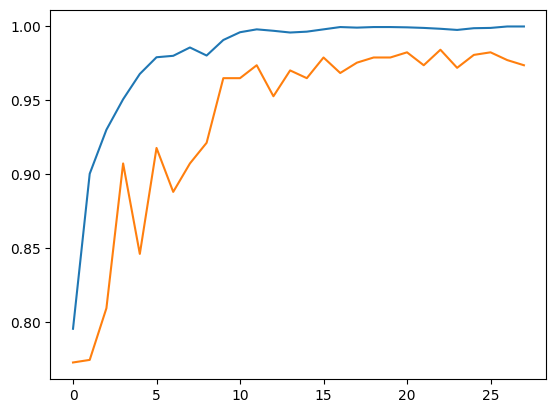

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

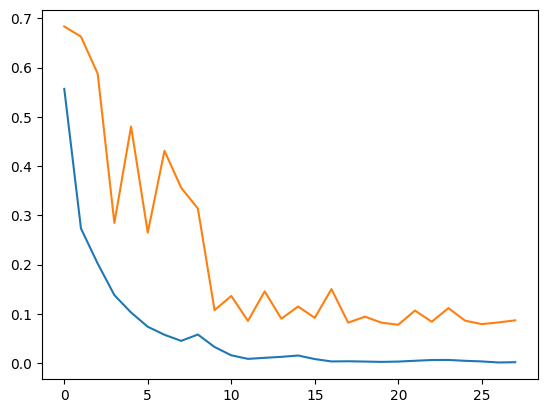

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

### **Checking model performance**

### **Importing libraries**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import seaborn as sns

In [ ]:
testing = image_processing(test_data)
test_labelling = endcoding(test_labels)

### **Model Prediction**

In [ ]:
test_predic = model1.predict(testing)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step


In [ ]:
np.argmax(test_predic, axis=1)

array([3, 3, 2, ..., 3, 1, 3])

### **Building classification report**

In [ ]:
print('Classification Report: ')
print(classification_report(test_labelling, np.argmax(test_predic, axis=1)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       300
           1       0.97      0.98      0.98       306
           2       1.00      1.00      1.00       405
           3       0.99      1.00      1.00       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



### **Building confusion metrics**

Confusion Metrics: 
[[293   7   0   0]
 [  2 300   2   2]
 [  0   1 404   0]
 [  0   1   0 299]]


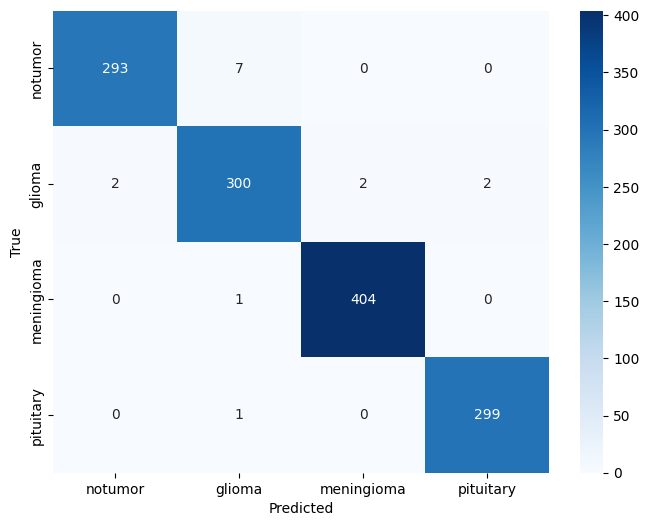

In [ ]:
print('Confusion Metrics: ')
conf_metric = confusion_matrix(test_labelling, np.argmax(test_predic, axis=1))
print(conf_metric)

plt.figure(figsize=(8,6))
sns.heatmap(conf_metric, annot=True,cmap='Blues', fmt='d', xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Checking precision score**

In [ ]:
print('Precision Score')
print(precision_score(test_labelling, np.argmax(test_predic, axis=1), average='weighted'))

Precsion Score
0.9886079717485422


# **Saveing built model**

In [ ]:
#Saving Model
model1.save('model.keras')

### **Saving weight of the model**

In [ ]:
model1.save_weights('model.weights.h5')
print("✅ Saved weights as model.weights.h5")

✅ Saved weights as model.weights.h5


### **Generating code for Testing Model for prediction**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# glioma - 0
# meningioma - 1
# notumor - 2
# pituitary - 3

#Making function for prediction
def detect_and_display(path):
    mpimg.imread(path)         #Displaying Image
    plt.imshow(mpimg.imread(path))
    plt.show()
    img = Image.open(path)
    img = img.resize((128, 128))
    img = img.convert('RGB')
    img = np.array(img) / 255.0

    # Add batch dimension - THIS IS CRITICAL!
    img = np.expand_dims(img, axis=0)  # Shape: (1, 128, 128, 3)

    prediction = model.predict(img)
    result = np.argmax(prediction, axis=1)
    confidence_score = f'{round(np.max(prediction, axis=1)[0]*100, 2)}%'
    if result == 0:
        print("Glioma Tumor", confidence_score)
    elif result == 1:
        print("Meningioma Tumor",confidence_score)
    elif result == 2:
        print("No Tumor",confidence_score)
    else:
        print("Pituitary Tumor",confidence_score)


### **Improting images for prediction**

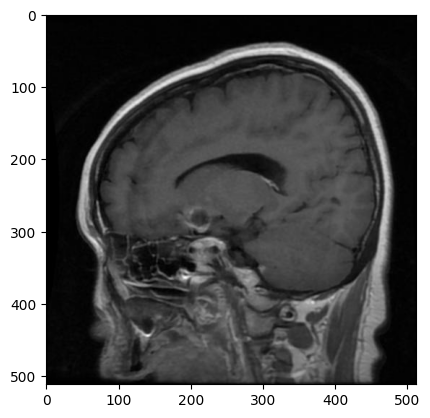

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
Pituitary Tumor 99.98999786376953%


In [ ]:
detect_and_display('/content/Training/pituitary/Tr-pi_0144.jpg')

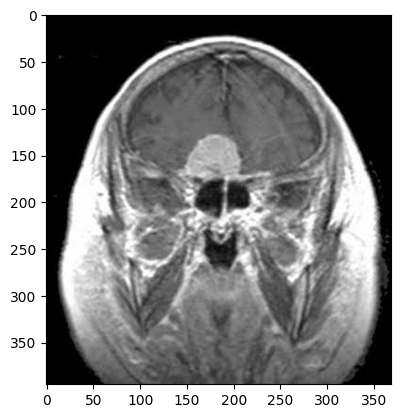

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Meningioma Tumor 100.0%


In [ ]:
detect_and_display('/content/Training/meningioma/Tr-me_0225.jpg')

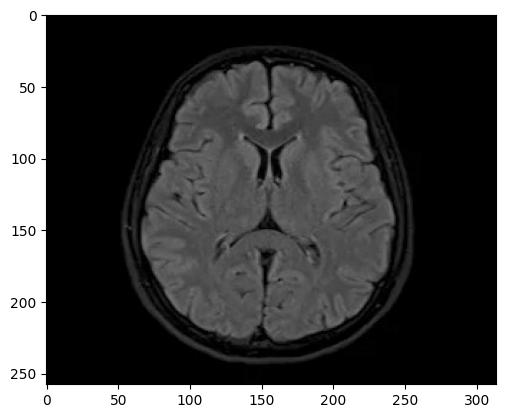

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
No Tumor 100.0%


In [ ]:
detect_and_display('/content/Testing/notumor/Te-noTr_0002.jpg')